# 1. Objectif d'analyse

TO BE COMPLETED

In [1]:
import pandas as pd
import numpy as np
import glob
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import plotly.express as px
from sklearn.cluster import KMeans

# 2. Data collection and preparation

Our dataset in located into 9 separated text files and the attributes representing each columns/variable are listed in a description file. We will create a new dataframe by concatenating all the information in those separated files

In [2]:
INPUT_PATH = 'inputs/dataset'
ATTRIBUTES = ["COMPACTNESS","CIRCULARITY","DISTANCE_CIRCULARITY","RADIUS_RATIO","PR_AXIS_ASPECT_RATIO",
              "MAX_LENGTH_ASPECT_RATIO","SCATTER RATIO","ELONGATEDNESS","PR_AXIS_RECTANGULARITY","MAX_LENGTH_RECTANGULARITY",
             "SCALED_VARIANCE_ALONG_MAJOR_AXIS","SCALED_VARIANCE_ALONG_MINOR_AXIS","SCALED_RADIUS_OF_GYRATION",
             "SKEWNESS_ABOUT_MAJOR_AXIS","SKEWNESS_ABOUT_MINOR_AXIS","KURTOSIS_ABOUT_MAJOR_AXIS","KURTOSIS_ABOUT_MINOR_AXIS","HOLLOWS RATIO","VEHICLE"]


In [5]:
glob.glob(INPUT_PATH+"/*.dat")

['inputs/dataset/xaf.dat',
 'inputs/dataset/xag.dat',
 'inputs/dataset/xac.dat',
 'inputs/dataset/xah.dat',
 'inputs/dataset/xab.dat',
 'inputs/dataset/xae.dat',
 'inputs/dataset/xaa.dat',
 'inputs/dataset/xad.dat',
 'inputs/dataset/xai.dat']

In [3]:
"""This function will help us read data from all our entries and return a single unified dataframe"""
def read_data():
    
    df = pd.concat([pd.read_csv(file, sep=" ",index_col=False,header=None,names=ATTRIBUTES) for file
                    in glob.glob(INPUT_PATH+"/*.dat")],ignore_index=True)
    return df

In [4]:
df = read_data()
df.shape

(846, 19)

In [5]:
df

COMPACTNESS  CIRCULARITY  DISTANCE_CIRCULARITY  RADIUS_RATIO  \
0             91           44                    66           151   
1            104           55                   109           230   
2            105           50                    93           173   
3            107           56                   105           202   
4             82           40                    73           141   
..           ...          ...                   ...           ...   
841           93           39                    87           183   
842           89           46                    84           163   
843          106           54                   101           222   
844           86           36                    78           146   
845           85           36                    66           123   

     PR_AXIS_ASPECT_RATIO  MAX_LENGTH_ASPECT_RATIO  SCATTER RATIO  \
0                      63                        7            137   
1                      67                       12            218   
2                      54                        4            222   
3                      61                       11            221   
4                      57                        8            153   
..                    ...                      ...            ...   
841                    64                        8            169   
842                    66                       11            159   
843                    67                       12            222   
844                    58                        7            135   
845                    55                        5            120   

     ELONGATEDNESS  PR_AXIS_RECTANGULARITY  MAX_LENGTH_RECTANGULARITY  \
0               48                      18                        146   
1               30                      24                        174   
2               30                      25                        159   
3               30                      25                        179   
4               44                      19                        133   
..             ...                     ...                        ...   
841             40                      20                        134   
842             43                      20                        159   
843             30                      25                        173   
844             50                      18                        124   
845             56                      17                        128   

     SCALED_VARIANCE_ALONG_MAJOR_AXIS  SCALED_VARIANCE_ALONG_MINOR_AXIS  \
0                                 166                               280   
1                                 230                               706   
2                                 254                               735   
3                                 234                               725   
4                                 173                               342   
..                                ...                               ...   
841                               200                               422   
842                               173                               368   
843                               228                               721   
844                               155                               270   
845                               140                               212   

     SCALED_RADIUS_OF_GYRATION  SKEWNESS_ABOUT_MAJOR_AXIS  \
0                          167                         72   
1                          226                         67   
2                          206                         83   
3                          212                         72   
4                          153                         75   
..                         ...                        ...   
841                        149                         72   
842                        176                         72   
843                 

We have 846 entries in our dataset. Each entry is described by 19 attributes, one of them being the name of the car model

# 3. Data description and visualisation

## 3.1. Brief description of numeric attributes

In [15]:
df.describe().T

count        mean         std    min  \
COMPACTNESS                       846.0   93.678487    8.234474   73.0   
CIRCULARITY                       846.0   44.861702    6.169866   33.0   
DISTANCE_CIRCULARITY              846.0   82.088652   15.771533   40.0   
RADIUS_RATIO                      846.0  168.940898   33.472183  104.0   
PR_AXIS_ASPECT_RATIO              846.0   61.693853    7.888251   47.0   
MAX_LENGTH_ASPECT_RATIO           846.0    8.567376    4.601217    2.0   
SCATTER RATIO                     846.0  168.839243   33.244978  112.0   
ELONGATEDNESS                     846.0   40.933806    7.811560   26.0   
PR_AXIS_RECTANGULARITY            846.0   20.582742    2.592138   17.0   
MAX_LENGTH_RECTANGULARITY         846.0  147.998818   14.515652  118.0   
SCALED_VARIANCE_ALONG_MAJOR_AXIS  846.0  188.625296   31.394837  130.0   
SCALED_VARIANCE_ALONG_MINOR_AXIS  846.0  439.911348  176.692614  184.0   
SCALED_RADIUS_OF_GYRATION         846.0  174.703310   32.546490  109.0   
SKEWNESS_ABOUT_MAJOR_AXIS         846.0   72.462175    7.486974   59.0   
SKEWNESS_ABOUT_MINOR_AXIS         846.0    6.377069    4.918353    0.0   
KURTOSIS_ABOUT_MAJOR_AXIS         846.0   12.599291    8.931240    0.0   
KURTOSIS_ABOUT_MINOR_AXIS         846.0  188.932624    6.163949  176.0   
HOLLOWS RATIO                     846.0  195.632388    7.438797  181.0   

                                     25%    50%    75%     max  
COMPACTNESS                        87.00   93.0  100.0   119.0  
CIRCULARITY                        40.00   44.0   49.0    59.0  
DISTANCE_CIRCULARITY               70.00   80.0   98.0   112.0  
RADIUS_RATIO                      141.00  167.0  195.0   333.0  
PR_AXIS_ASPECT_RATIO               57.00   61.0   65.0   138.0  
MAX_LENGTH_ASPECT_RATIO             7.00    8.0   10.0    55.0  
SCATTER RATIO                     146.25  157.0  198.0   265.0  
ELONGATEDNESS                      33.00   43.0   46.0    61.0  
PR_AXIS_RECTANGULARITY             19.00   20.0   23.0    29.0  
MAX_LENGTH_RECTANGULARITY         137.00  146.0  159.0   188.0  
SCALED_VARIANCE_ALONG_MAJOR_AXIS  167.00  178.5  217.0   320.0  
SCALED_VARIANCE_ALONG_MINOR_AXIS  318.25  364.0  587.0  1018.0  
SCALED_RADIUS_OF_GYRATION         149.00  173.0  198.0   268.0  
SKEWNESS_ABOUT_MAJOR_AXIS          67.00   71.5   75.0   135.0  
SKEWNESS_ABOUT_MINOR_AXIS           2.00    6.0    9.0    22.0  
KURTOSIS_ABOUT_MAJOR_AXIS           5.00   11.0   19.0    41.0  
KURTOSIS_ABOUT_MINOR_AXIS         184.00  188.0  193.0   206.0  
HOLLOWS RATIO                     190.25  197.0  201.0   211.0

**The first look of our data allows us to capture the following elements:**
* The dataset is described by 18 attributes

* All our variables are continuous except the last one which is the name of the car model and will be used for classification

* It looks like we do not have null or empty values (Except if the zero value for some attribute was meaning null value, but we do not have that kind of information from the data publisher) since the count of every attribute is 846

* The attributes "MAX_LENGTH_ASPECT_RATIO", "ELONGATEDNESS", "SKEWNESS_ABOUT_MINOR_AXIS" and "PR_AXIS_RECTANGULARITY" have very low range of values compared to the other attributes like "SCALED_VARIANCE_ALONG_MINOR_AXIS". So we may need to rescale attributes in case of performing unsupervised learning.

#### Check for null values

In [37]:
df.isnull().sum()

COMPACTNESS                         0
CIRCULARITY                         0
DISTANCE_CIRCULARITY                0
RADIUS_RATIO                        0
PR_AXIS_ASPECT_RATIO                0
MAX_LENGTH_ASPECT_RATIO             0
SCATTER RATIO                       0
ELONGATEDNESS                       0
PR_AXIS_RECTANGULARITY              0
MAX_LENGTH_RECTANGULARITY           0
SCALED_VARIANCE_ALONG_MAJOR_AXIS    0
SCALED_VARIANCE_ALONG_MINOR_AXIS    0
SCALED_RADIUS_OF_GYRATION           0
SKEWNESS_ABOUT_MAJOR_AXIS           0
SKEWNESS_ABOUT_MINOR_AXIS           0
KURTOSIS_ABOUT_MAJOR_AXIS           0
KURTOSIS_ABOUT_MINOR_AXIS           0
HOLLOWS RATIO                       0
VEHICLE                             0
dtype: int64

As seen in the previous figure, there are no null values in our dataset

#### We check if there are duplicated rows

In [13]:
df.duplicated().any()

False

**We have no duplicated rows in our dataset**

## 3.2. Data visualisation

### 3.2.1. Vehicle type distribution 

<AxesSubplot:title={'center':'Fig.1: Distribution of each car model in our dataset'}, xlabel='VEHICLE', ylabel='count'>

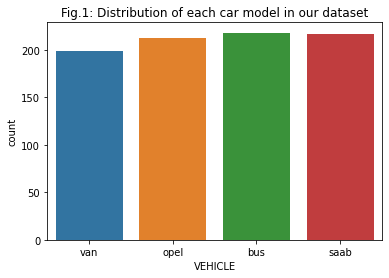

In [19]:
plt.title("Fig.1: Distribution of each car model in our dataset")
sns.countplot(df["VEHICLE"])

In [18]:
df["VEHICLE"].value_counts()

bus     218
saab    217
opel    212
van     199
Name: VEHICLE, dtype: int64

**As shown in the previous figure, we can see the distribution of car model in our dataset.
As we can see, we have four (4) car models (van, opel, bus, saab) and they are globally well balanced between 199 and 218 examples per car model in our dataset**

### 3.2.2. Explanatory variable distributions

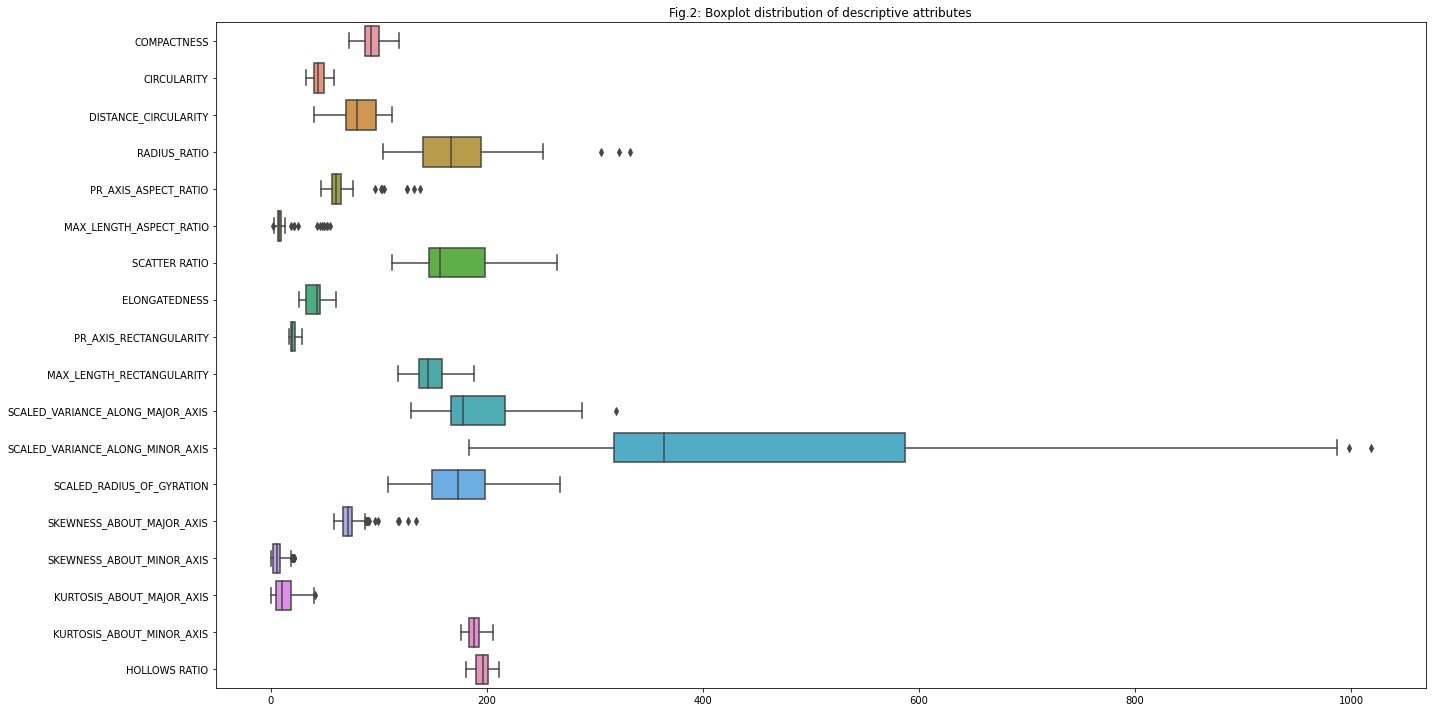

In [20]:
plt.figure(figsize=(20,10))

sns.boxplot(data=df,orient="h")
plt.title("Fig.2: Boxplot distribution of descriptive attributes")
plt.tight_layout()

**The figure 2 shows us the distribution of all attributes describing our vehicle models.**

**Main highlights**

* The variable "SCALED_VARIANCE_ALONG_MINOR_AXIS" has a wider range of values than other attributes. It's distribution is also very skewed to the left. So 50% of vehicles have really more sparse values (between the 50 percentile and the max value)

* "SCATTER RATIO", "SCALED_VARIANCE_ALONG_MAJOR_AXIS" attributes have less wider range of values than previous attribute, but they have the particularity that their distribution are also very skewed to the left as the previous attribute. Maybe a vehicle discriminative pattern (We will check it later on)

* On the contrary of previously cited variables, the variable "ELONGATEDNESS is very skewed to the right

* "MAX_LENGTH_ASPECT_RATIO" and "PR_AXIS_RECTANGULARITY", "SKEWNESS_ABOUT_MINOR_AXIS" variables are completely visually shrinked because of their range of values. They are not at the same scale as other. We should rescale the variables to have a better view

* We observe a certain number of significant outliers mainly for variables "MAX_LENGTH_ASPECT_RATIO", "SKEWNESS_ABOUT_MAJOR_AXIS" and "PR_AXIS_RECTANGULARITY"


**While, the figure 2 presents the global distribution of descriptive attributes, it does not take into account distribution of the attributes relatively to a specific vehicle model. Let's visualize those distribution for each vehicle type**

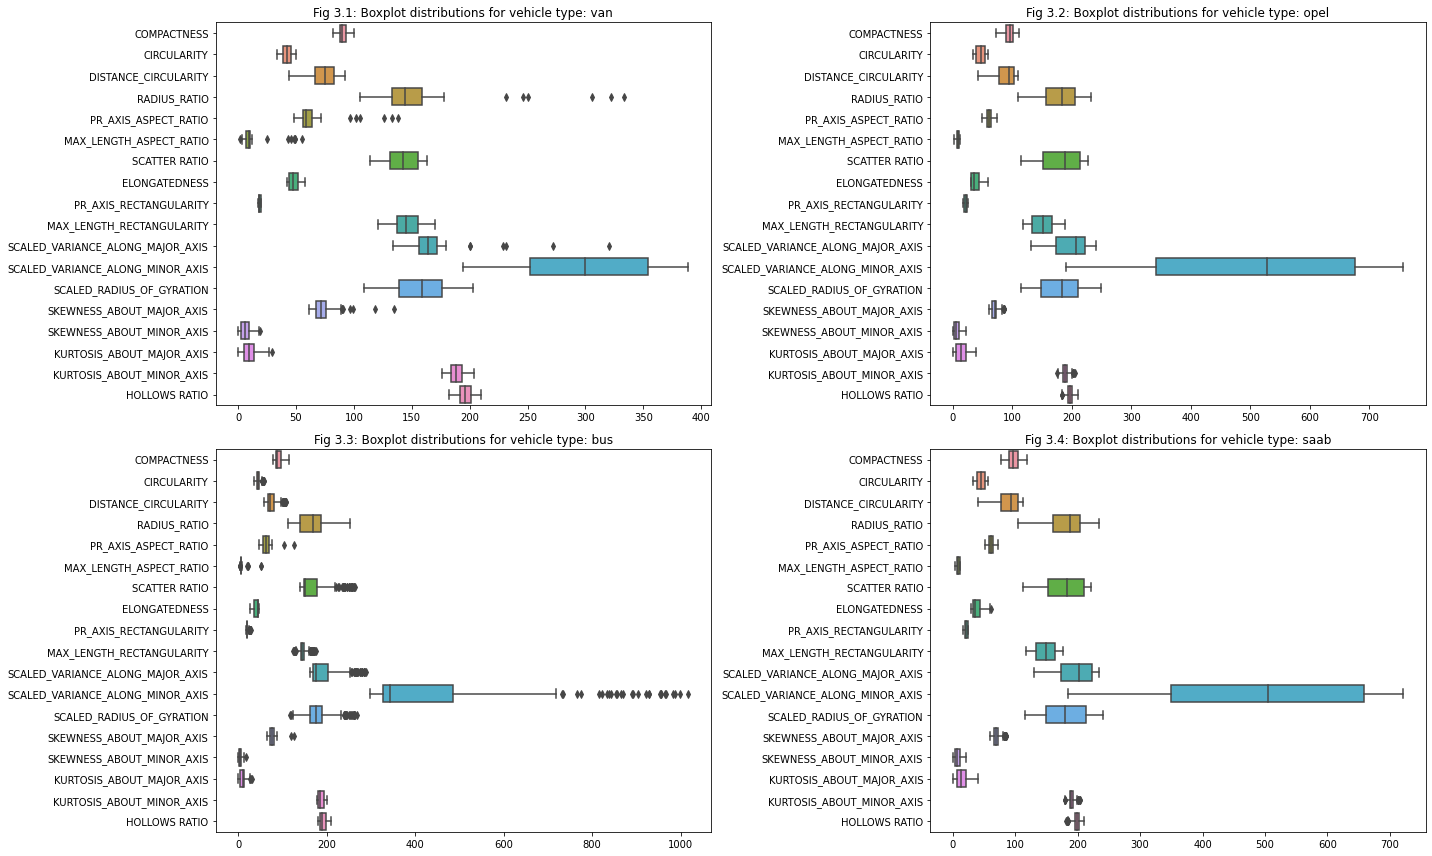

In [15]:
plt.figure(figsize=(20,12))
for i,c in enumerate(df["VEHICLE"].unique()):
    
    ax = plt.subplot(2,2,i+1)
    sns.boxplot(data=df.loc[df["VEHICLE"]==c,:],orient="h",ax=ax)
    ax.set_title("Fig 3.%d: Boxplot distributions for vehicle type: %s"%(i+1,c))

#plt.title("Fig.3: Boxplot distribution of descriptive attributes per vehicle model",loc='center')    
plt.tight_layout()

The figure 3 above shows us the distribution of variables relatively to the type of vehicle to predict.
**Here are the main highlights for that illustration:**

* We can see that the left skewness of the variable "SCALED_VARIANCE_ALONG_MINOR_AXIS" we showcased previously is mainly due to the bus vehicle category ( since that variable is almost well centered around the mean for the three other attributes)
* We can say the same thing for variables "SCATTER_RATIO" and "SCALED_VARIANCE_ALONG_MAJOR_AXIS" which distributions are left skewed for the bus vehicule type
* We can also see a lot of outlier points according to those left skewed variables. Maybe due to the specificity of that vehicle type  

### 3.2.3. Explanatory variables correlation study

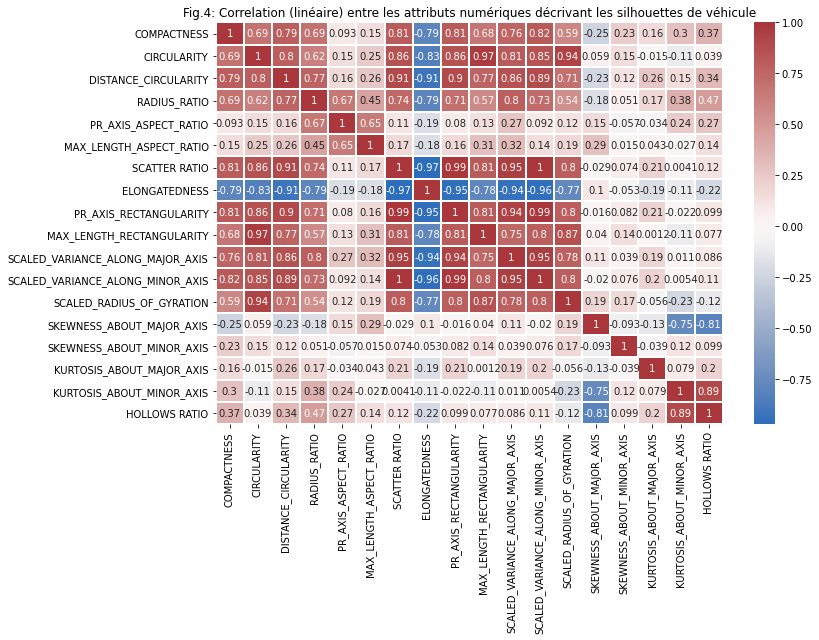

In [105]:
plt.figure(figsize=(12,9),tight_layout=True)
ax = plt.subplot(1,1,1)
sns.heatmap(df.corr(method="pearson"),cmap="vlag",center=0,ax=ax, annot=True,linewidths=1)
ax.set_title("Fig.4: Correlation (linéaire) entre les attributs numériques décrivant les silhouettes de véhicule")
plt.tight_layout()

**Figure 4 shows us the (linear) correlations that may exists between our explanatory variables. We can see a bunch of strong and very strong correlations. This could be explained by the fact that some varable calculation is derived from the value from other variables and thus may imply strong correlation between them.**

After having taking into account that amount of highly correlated variables, we see that it may be useful to reduce our variable into a subspace of few significative new variables that capture the most variability inside our data. This will also be helpful in case we implement models like logistic regression which is more performant when explanatory variables are independant

Before that let's have a brief view on the main correlated variables:

* MAX_LENGHT_RECTANGULARITY AND CIRCULARITY (0.97)
* SCALED_RADIUS_OF_GYRATION AND CIRCULARITY (0.95)
* SCALED_VARIANCE_ALONG_MINOR_AXIS AND PR_AXIS_RECTANGULARITY (0.98)
* PR_AXIS_RECTANGULARITY AND SCATTER RATION (0.98)
* ...

#### Now let's have a view on those correlation relatively to the vehicle type to see if some correlations mostly appear for some specific vehicle types or not

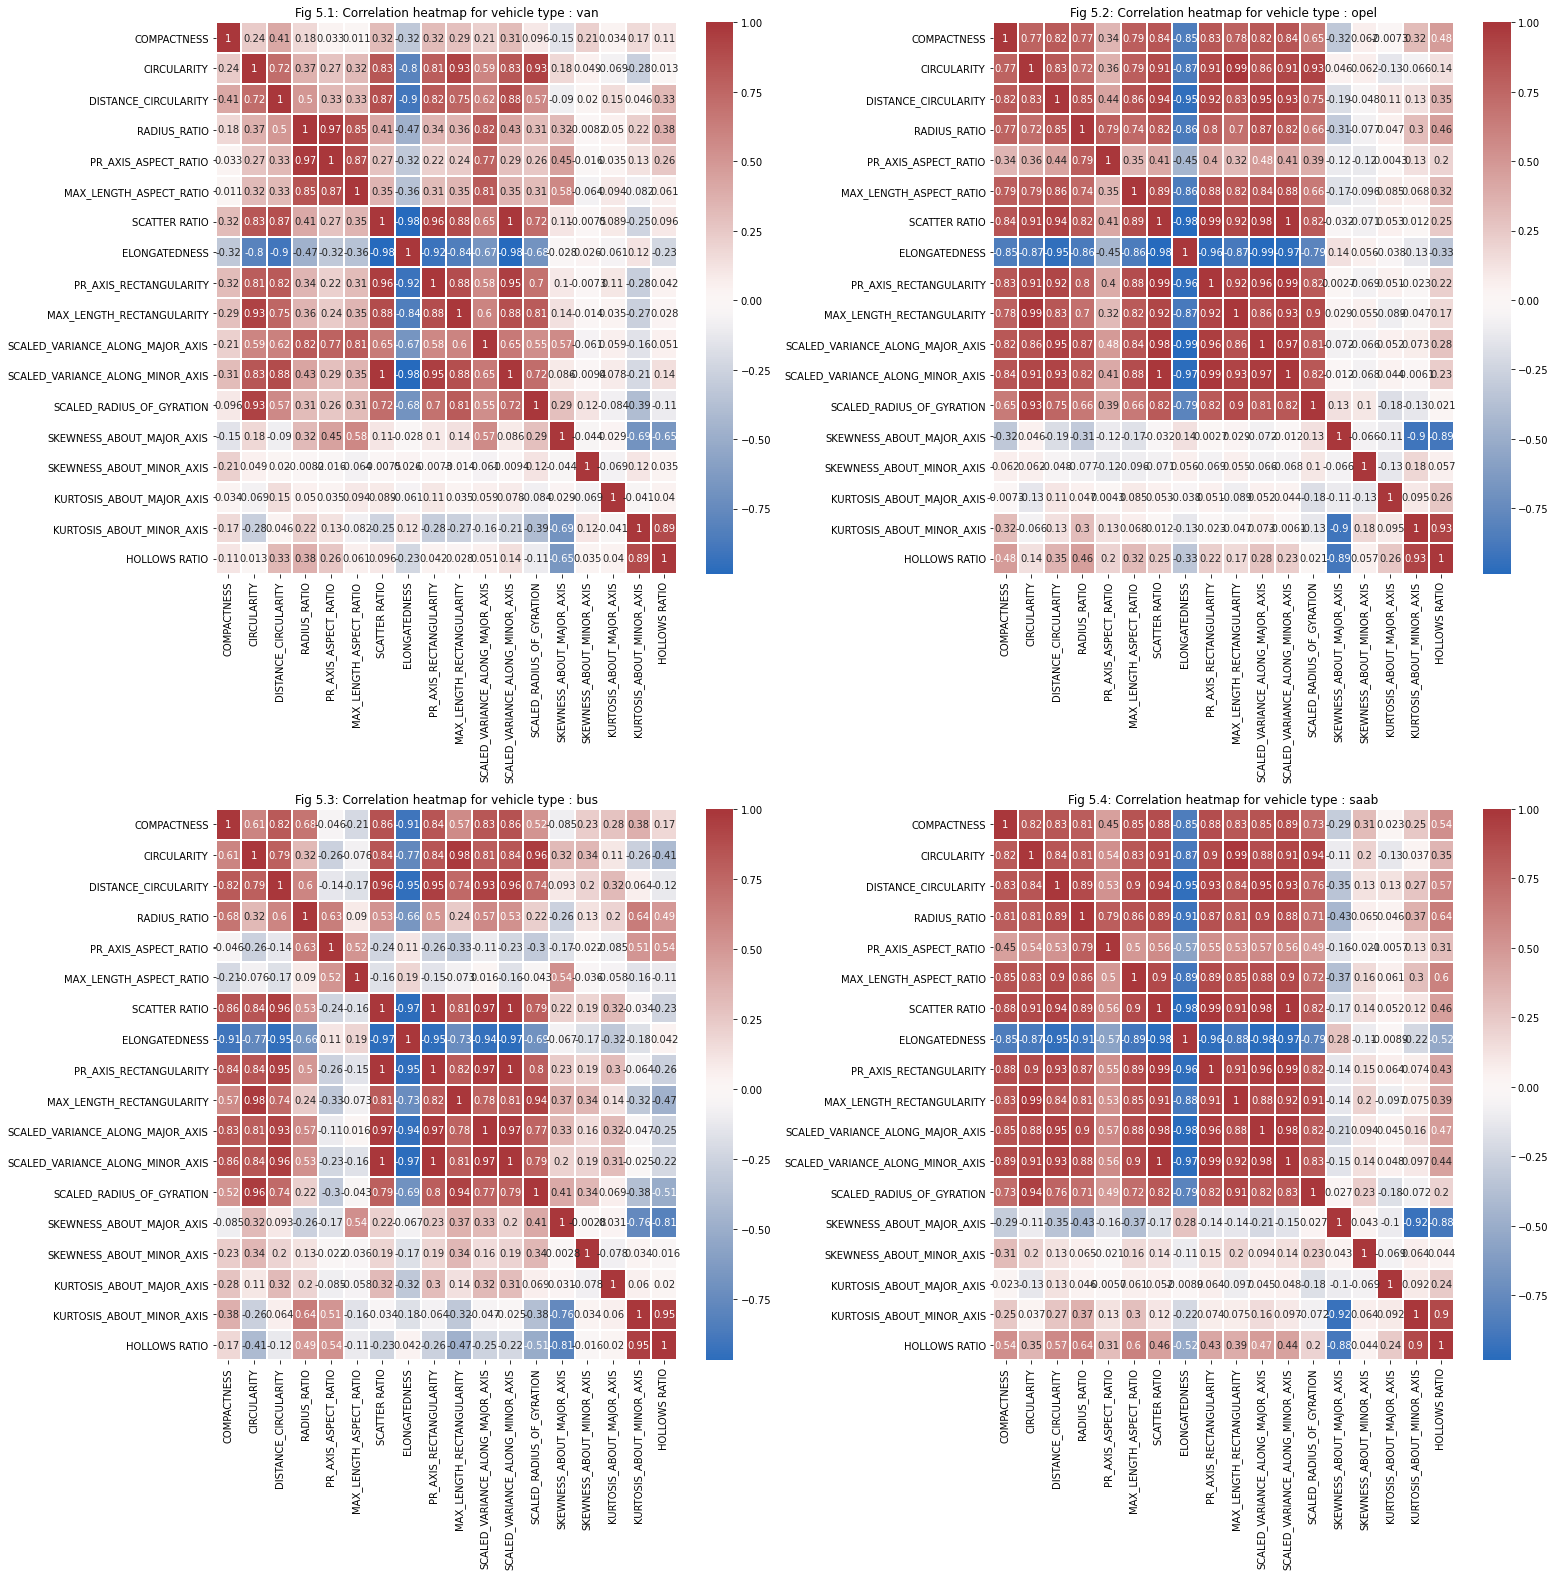

In [104]:
plt.figure(figsize=(22,22))
for i,c in enumerate(df["VEHICLE"].unique()):
    
    ax = plt.subplot(2,2,i+1)
    
    sns.heatmap(df.loc[df["VEHICLE"]==c,:].corr(method="pearson"),cmap="vlag",center=0,ax=ax, linewidths=1,annot=True)
    ax.set_title("Fig 5.%d: Correlation heatmap for vehicle type : %s"%(i+1,c))
    
plt.tight_layout()

**All figure 5 shows the correlation heatmap respectively to each vehicle type. And we can see that correlations between variables are not the same depending on the fact that the vehicle type is saab or a bus for example. But we have some other correlations that stay strong whatever the vehicle type is.**





We can recapitulate the information of the previous boxplot and correlations heatmap into the following pairplot (Fig.6). 


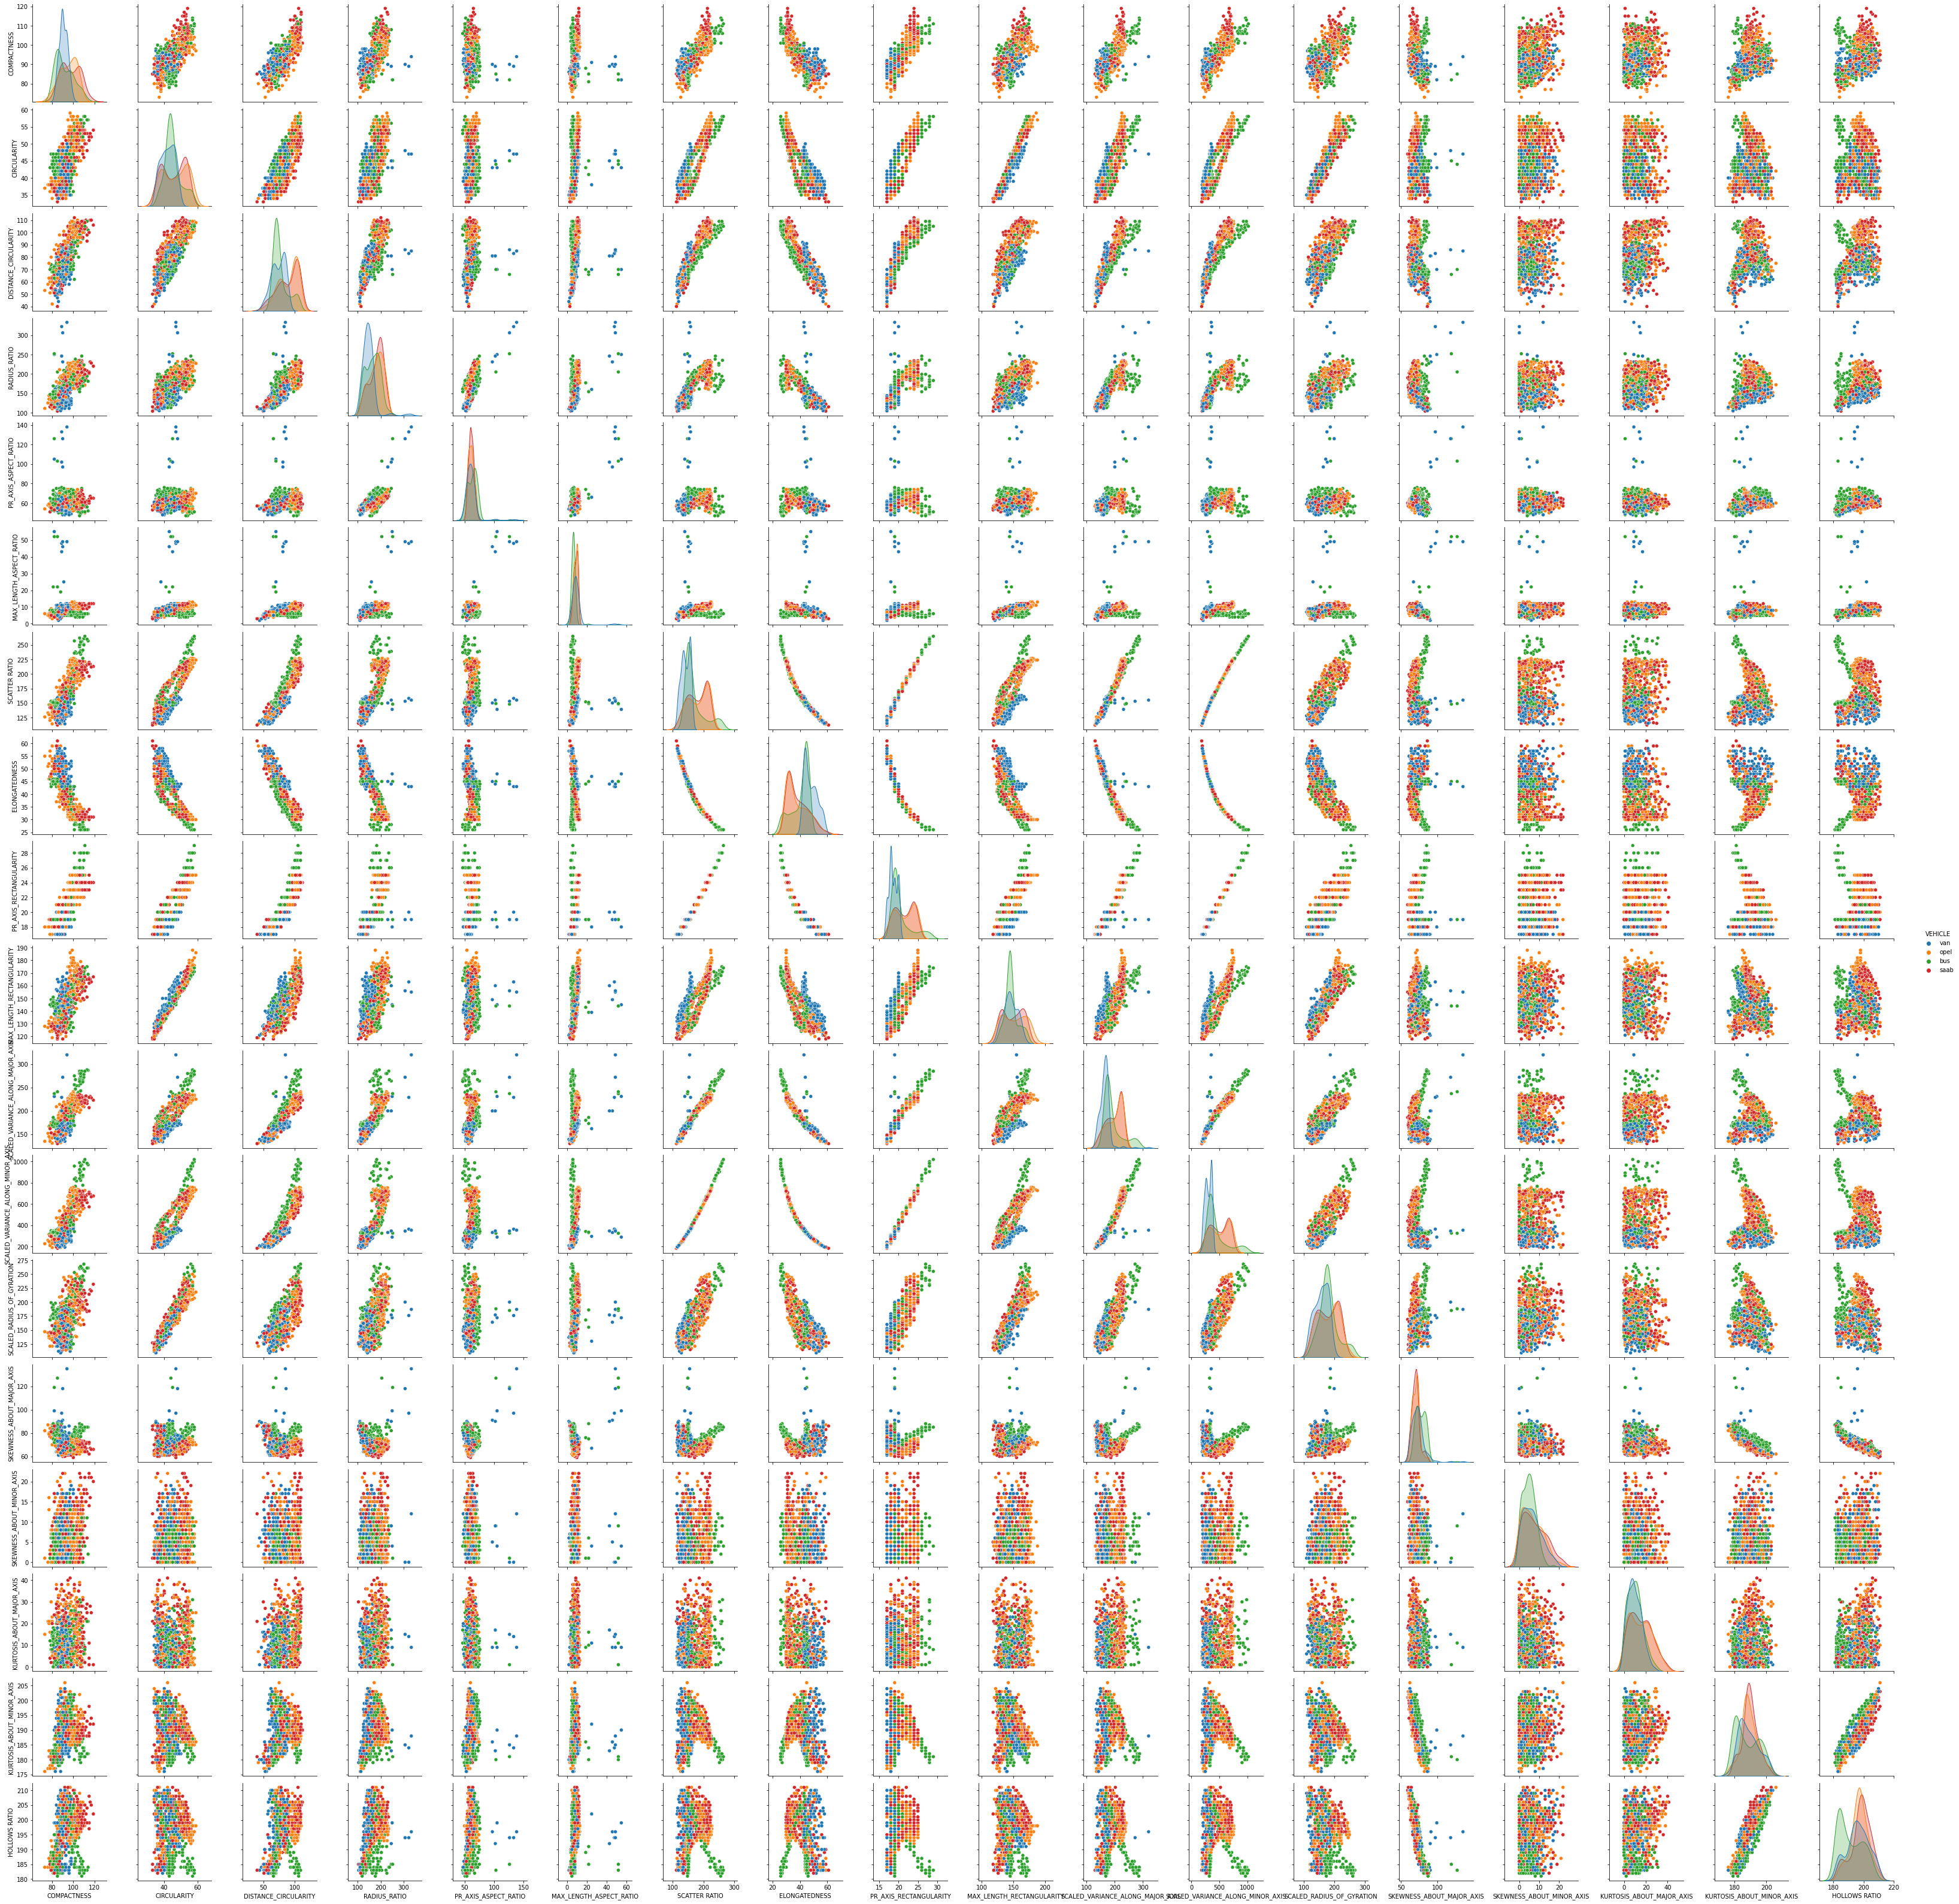

In [42]:
sns.pairplot(df,hue="VEHICLE")
plt.title("Fig.6 : Pairplot of variable relationships")

**Figure 6 shows a grid containing the following information :**

* In the diagonal, we have the distributions (accordingly to each vehicle type which is visually identified by a specific color) of the variable represent in that diagonal. 
* In the non diagonal cells, we have a scatter plot accordingly to the variable in the x and y coordinates. Different colors represent different vehicle type

# 4. Feature engeneering

As we saw in the previous visualisation step :
* **The scale of some variables is less wider than the scale of some other variables. We may then need to normalize our dataset and see if it produce better performance in task like unsupervised learning**


* **There are too much correlated variables and in can hurt some linear models due to a lot of dependance between descriptive variables. We will then apply a dimensionality reduction technique like PCA.**

After each step, we are going to conserve the original dataset to make performance comparisons when apply unsupervised and supervised learning

## 4.1. Data Normalization/Standardization



We have two options here:
* Normalize our data by making value of each ranging between [0,1]
* Standardize our data to make them have a 0 mean and a unit standard deviation

We will apply both and plot boxplot to see the impact visually

In [16]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [22]:
# We create the data matrix of our data. X is the matrix containing the explanatory variables and y is the vector containing
# the vehicle type

X = df.loc[:,ATTRIBUTES[:-1]].to_numpy()
y = df.loc[:,ATTRIBUTES[-1]].to_numpy()

In [26]:
normalizer = MinMaxScaler()
normalizer.fit(X)
X_normalized = normalizer.transform(X)

In [29]:
standardizer = StandardScaler()
standardizer.fit(X)
X_standardized = standardizer.transform(X)

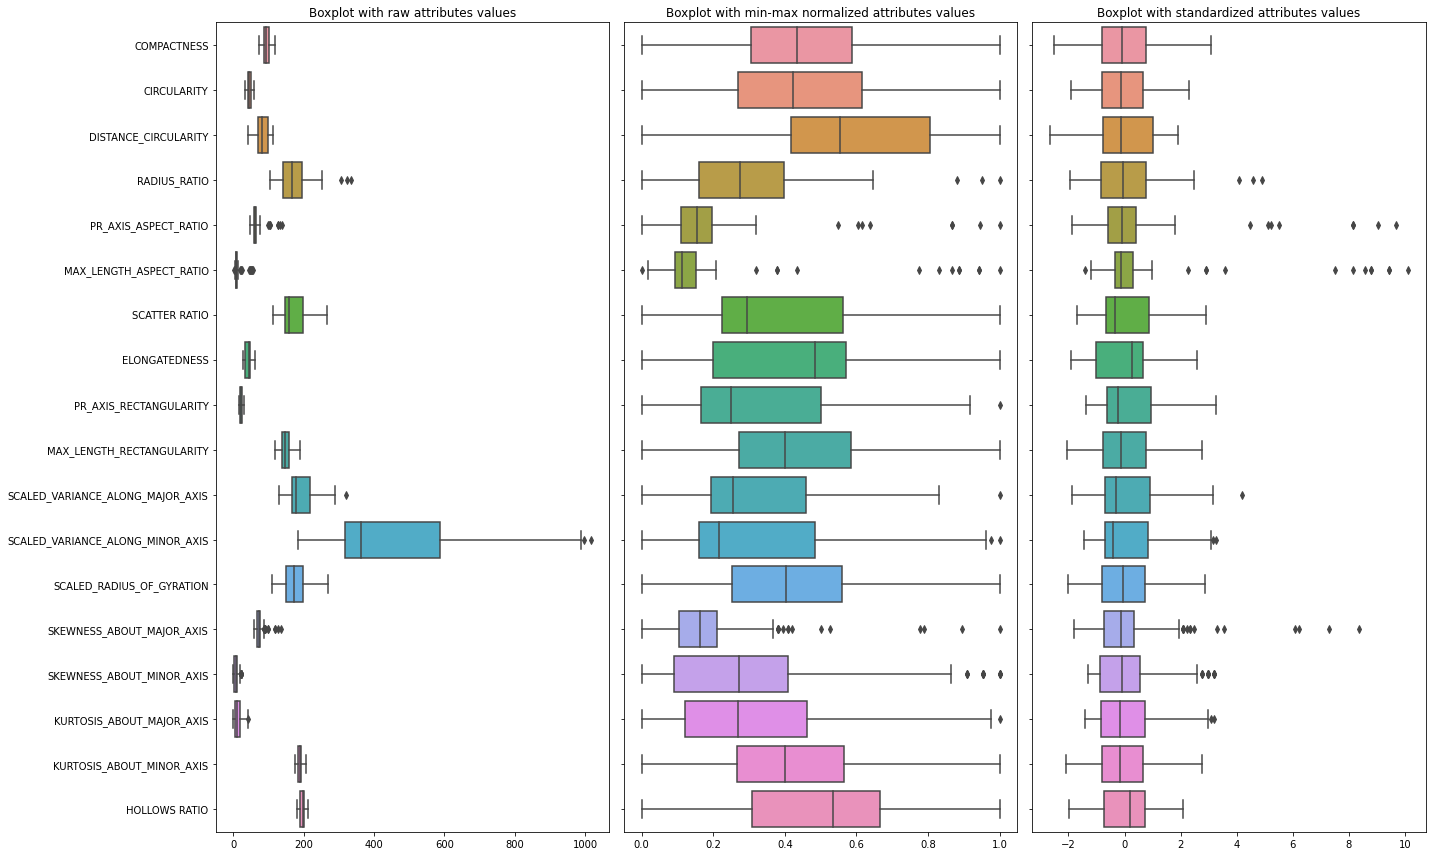

In [68]:

fig, (ax1,ax2,ax3) = plt.subplots(1,3,sharey=True,figsize=(20,12))

sns.boxplot(data=X,orient="h",ax=ax1)
ax1.set_title("Boxplot with raw attributes values")

sns.boxplot(data=X_normalized,orient="h",ax=ax2)
ax2.set_title("Boxplot with min-max normalized attributes values")

sns.boxplot(data=X_standardized,orient="h",ax=ax3)
ax3.set_title("Boxplot with standardized attributes values")

ax1.set_yticklabels(ATTRIBUTES[:-1])


#plt.title("Fig.3: Boxplot distribution of descriptive attributes per vehicle model",loc='center')    
plt.tight_layout()

The previous figure show us the distributions of variables when nor normalized, when normalized by the range, and when standardized to have 0 mean and a unit standard deviation

## 4.2. Dimensionality reduction - Principal Component Analysis (PCA)

We will apply PCA on the standardize data.

In [69]:
from sklearn.decomposition import PCA

In [70]:
pca = PCA(n_components=None)

In [80]:
pca.fit(X_standardized)

PCA()

In [82]:
explained_var_ratio = pca.explained_variance_ratio_
cum_explained_var_ratio = np.cumsum(explained_var_ratio)

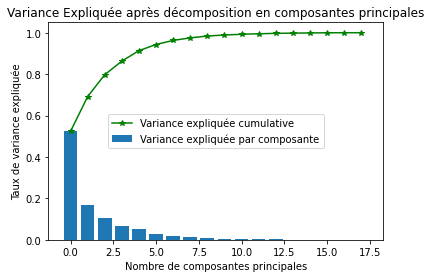

In [97]:
plt.bar(range(len(ATTRIBUTES)-1),explained_var_ratio, label="Variance expliquée par composante")
plt.plot(range(len(ATTRIBUTES)-1),cum_explained_var_ratio,'g-*', label="Variance expliquée cumulative")
plt.ylabel("Taux de variance expliquée")
plt.xlabel("Nombre de composantes principales")
plt.legend(loc="center")
plt.title("Variance Expliquée après décomposition en composantes principales")
plt.show()

In [96]:
cum_explained_var_ratio

array([0.52378531, 0.69171935, 0.79719604, 0.86287318, 0.91343532,
       0.94306737, 0.96284706, 0.97511342, 0.98389396, 0.98896691,
       0.99246237, 0.99489828, 0.99684527, 0.99803108, 0.99891947,
       0.99963577, 0.99997986, 1.        ])

**We can see that with just 8 variables we are explaining 97.5% of the variance in the dataset. So we can go forward with 8 just 8 variables.**

In [101]:
X_reduced = pca.transform(X_standardized)[:,:8]

## Unsupervised Learning

In [111]:
#number_of_cluster = [2,3,4,5,6,7,8,9,10]
#kmeans_list = []

kmeans = KMeans(n_clusters=2)
X_new = kmeans.fit_transform(df.loc[:,ATTRIBUTES[:-1]].to_numpy())

<AxesSubplot:>

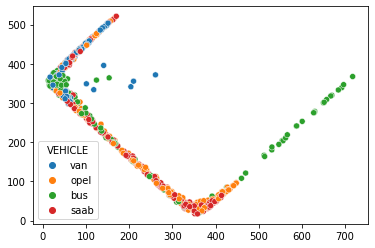

In [120]:
sns.scatterplot(y=X_new[:,0],x=X_new[:,1],hue=df['VEHICLE'])

**TO DO**
* UNSUPERVISED LEARNING - KMEANS, CAH, HIERARCHIQUE, CALCULER LES SILHOUETTES POUR EVALUER LE CLUSTERING,...
* SUPERVISED LEARNING - ARBRES, KNN, LOGISTIC REGRESSION, SVM AVEC METHODE À NOYAUX.... APPLIQUER DU BOOSTRAP, VALIDATION CROISEE,
* ANALYSER LES PERFORMANCES
